In [1]:
#imports 
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter, FuncFormatter
%matplotlib inline
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
from cycler import cycler
import os
import seaborn as sns
sns.set()

# environment settings
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [7]:
os.getcwd()

'/Users/asyagadzhalova/Documents/GitHub/Boston-Airbnb-data'

In [3]:
os.chdir('..')

In [12]:
#read data
calendar = pd.read_csv(os.getcwd()+'/src/data/raw_data/calendar.csv')
listings =  pd.read_csv(os.getcwd()+'/src/data/raw_data/listings.csv')
reviews = pd.read_csv(os.getcwd()+'/src/data/raw_data/reviews.csv')

In [11]:
calendar.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

## Calendar data
Calendar, including listing id and the price and availability for that day

In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [4]:
calendar.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [5]:
calendar.isna().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [6]:
calendar['date'].min()

'2016-09-06'

In [7]:
calendar['date'].max()

'2017-09-05'

In [8]:
calendar['listing_id'].nunique()

3585

In [9]:
calendar['available'].value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [10]:
calendar[calendar['price'].isna()==True].groupby(['available']).agg({'count'})

listing_id    date price
               count   count count
available                         
f             665853  665853     0

In [11]:
#check whether we have values for each listing for every day
check_dates = calendar.groupby(['listing_id']).agg({'date':'count'}).reset_index()
check_dates['date'].value_counts()

365    3584
730       1
Name: date, dtype: int64

In [12]:
#There is one listing with duplicated records 
check_dates[check_dates['date']==730]

listing_id  date
2727    12898806   730

In [13]:
calendar[calendar['listing_id']==12898806].shape

(730, 4)

In [14]:
#calendar[calendar['listing_id']==12898806]

In [15]:
calendar.drop_duplicates(subset = ['listing_id','date'],inplace=True)

In [16]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308525 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308525 non-null  int64 
 1   date        1308525 non-null  object
 2   available   1308525 non-null  object
 3   price       642957 non-null   object
dtypes: int64(1), object(3)
memory usage: 49.9+ MB


In [17]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].map(lambda x: x.strftime('%Y-%m'))
calendar['week'] = calendar['date'].map(lambda x: x.strftime("%V"))

In [18]:
cal_avail = calendar.groupby(['listing_id','available']).agg({'date':'nunique'}).reset_index()

In [19]:
cal_avail

listing_id available  date
0           3353         f   116
1           3353         t   249
2           5506         f    21
3           5506         t   344
4           6695         f    41
5           6695         t   324
6           6976         f    46
7           6976         t   319
8           8792         f   117
9           8792         t   248
10          9273         f     1
11          9273         t   364
12          9765         f     3
13          9765         t   362
14          9824         f    42
15          9824         t   323
16          9855         f     1
17          9855         t   364
18          9857         f    18
19          9857         t   347
20          9858         f     1
21          9858         t   364
22          9860         f    12
23          9860         t   353
24          9870         f     3
25          9870         t   362
26          9903         f     1
27          9903         t   364
28         10730         f   271
29         10730         t    94
30         10758         f   322
31         10758         t    43
32         10807         f   122
33         10807         t   243
34         10809         f   322
35         10809         t    43
36         10810         f   322
37         10810         t    43
38         10811         t   365
39         12356         f    92
40         12356         t   273
41         12441         f    60
42         12441         t   305
43         13059         f    32
44         13059         t   333
45         13589         f    57
46         13589         t   308
47         13592         f    11
48         13592         t   354
49         18711         f    28
50         18711         t   337
51         20000         f    24
52         20000         t   341
53         21337         f     1
54         21337         t   364
55         21891         f     1
56         21891         t   364
57         22208         f     8
58         22208         t   357
59         22212         f    17
60         22212         t   348
61         22354         f    29
62         22354         t   336
63         23619         f   113
64         23619         t   252
65         23668         f     1
66         23668         t   364
67         24240         f   114
68         24240         t   251
69         25142         f     1
70         25142         t   364
71         25418         f     1
72         25418         t   364
73         27141         f     6
74         27141         t   359
75         27611         f   292
76         27611         t    73
77         28150         f     9
78         28150         t   356
79         29155         f    54
80         29155         t   311
81         29765         f    96
82         29765         t   269
83         31796         f    47
84         31796         t   318
85         36885         f   312
86         36885         t    53
87         38579         f     1
88         38579         t   364
89         39116         f   114
90         39116         t   251
91         40601         f   106
92         40601         t   259
93         44205         f   101
94         44205         t   264
95         45987         t   365
96         47521         f    52
97         47521         t   313
98         47722         f     5
99         47722         t   360
100        47725         f     7
101        47725         t   358
102        48612         f   320
103        48612         t    45
104        50032         f    36
105        50032         t   329
106        52423         f     1
107        52423         t   364
108        54215         f     1
109        54215         t   364
110        54487         f     1
111        54487         t   364
112        54944         f    39
113        54944         t   326
114        56927         f     1
115        56927         t   364
116        56937         f     1
117        56937         t   364
118        57156         f   117
119        57156         t   248
120        57

In [20]:
cal_month_avail = calendar.groupby(['listing_id','month','available']).agg({'date':'nunique'}).reset_index()

In [21]:
cal_month_avail[cal_month_avail['available']=='f'].groupby('month').agg({'date':'sum'})

date
month         
2016-09  65239
2016-10  64821
2016-11  48692
2016-12  50142
2017-01  47954
2017-02  43570
2017-03  55954
2017-04  56168
2017-05  57535
2017-06  54819
2017-07  56172
2017-08  55574
2017-09   8928

<AxesSubplot:title={'center':'Reservations by month'}>

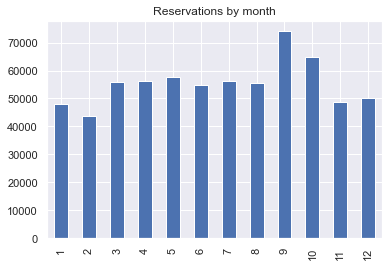

In [22]:
calendar[calendar['available']=='f']['date'].dt.month.value_counts().sort_index().plot(kind='bar', title='Reservations by month')

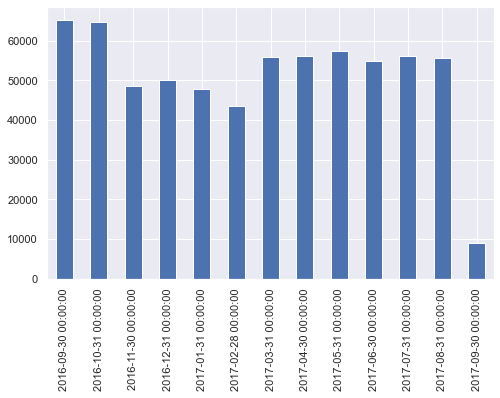

In [23]:
plt.figure(figsize=(8,5))
calendar[calendar['available']=='f']['date'].value_counts().resample('M').sum().plot(kind = 'bar', color='b')
plt.show() 

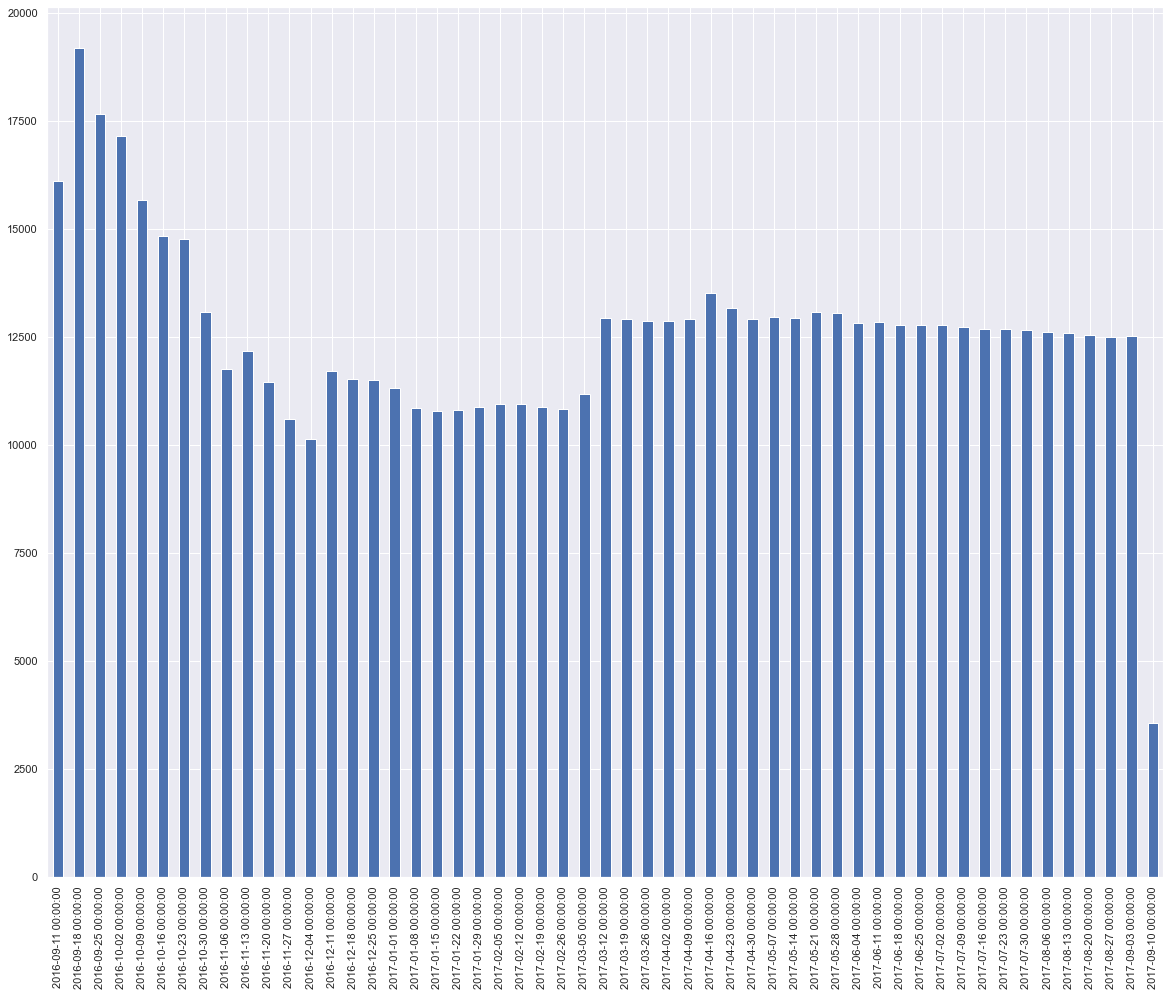

In [24]:
plt.figure(figsize=(20,16))
calendar[calendar['available']=='f']['date'].value_counts().resample('W').sum().plot(kind = 'bar', color='b')
plt.show() 

/var/folders/xx/52xcnk8x57b6lb5ws1h4mj2c0000gn/T/ipykernel_1802/506440649.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  calendar[calendar['available']=='f']['date'].dt.week.value_counts().sort_index().plot(kind='bar', title='Reservations by week')


<AxesSubplot:title={'center':'Reservations by week'}>

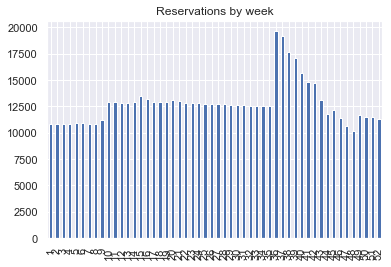

In [25]:
calendar[calendar['available']=='f']['date'].dt.week.value_counts().sort_index().plot(kind='bar', title='Reservations by week')

In [26]:
#calculate average occupancy rate per listing per month
cal_month_avail.head()

listing_id    month available  date
0        3353  2016-09         f    25
1        3353  2016-10         f    31
2        3353  2016-11         f    30
3        3353  2016-12         f    30
4        3353  2016-12         t     1

In [27]:
cal_month_total = cal_month_avail.groupby(['listing_id','month']).agg({'date':'sum'}).reset_index().rename({'date':'total_days'})

In [28]:
cal_month_total.rename({'date':'total_days'},inplace=True,axis=1)

In [29]:
cal_month_total.head()

listing_id    month  total_days
0        3353  2016-09          25
1        3353  2016-10          31
2        3353  2016-11          30
3        3353  2016-12          31
4        3353  2017-01          31

In [30]:
cal_month_busy = cal_month_avail[cal_month_avail['available']=='f'].groupby(['listing_id','month']).agg({'date':'sum'}).reset_index()
cal_month_busy.rename({'date':'busy_days'},inplace=True,axis=1)

In [31]:
cal_month_busy.head()

listing_id    month  busy_days
0        3353  2016-09         25
1        3353  2016-10         31
2        3353  2016-11         30
3        3353  2016-12         30
4        5506  2016-09         14

In [32]:
cal_month_total = cal_month_total.merge(cal_month_busy, how = 'left', left_on = ['listing_id','month'], right_on = ['listing_id','month'])

In [33]:
cal_month_total['busy_days'].fillna(0,inplace=True)
cal_month_total['occupancy_metrics'] = cal_month_total['busy_days']/cal_month_total['total_days']*100

In [34]:
cal_month_total.head()

listing_id    month  total_days  busy_days  occupancy_metrics
0        3353  2016-09          25       25.0         100.000000
1        3353  2016-10          31       31.0         100.000000
2        3353  2016-11          30       30.0         100.000000
3        3353  2016-12          31       30.0          96.774194
4        3353  2017-01          31        0.0           0.000000

In [35]:
cal_metrics_total = cal_month_total.groupby(['listing_id']).agg({'total_days':'sum','busy_days':'sum'}).reset_index()

In [37]:
cal_metrics_total[cal_metrics_total['listing_id']==1178162]

listing_id  total_days  busy_days
277     1178162         365       23.0

In [60]:
calendar[calendar['listing_id']==1178162]

listing_id       date available    price    month week
569035     1178162 2017-08-31         t   $95.00  2017-08   35
569036     1178162 2017-08-30         t   $95.00  2017-08   35
569037     1178162 2017-08-29         t   $95.00  2017-08   35
569038     1178162 2017-08-28         t   $95.00  2017-08   35
569039     1178162 2017-08-27         t   $95.00  2017-08   34
569040     1178162 2017-08-26         t   $95.00  2017-08   34
569041     1178162 2017-08-25         t   $95.00  2017-08   34
569042     1178162 2017-08-24         t   $95.00  2017-08   34
569043     1178162 2017-08-23         t   $95.00  2017-08   34
569044     1178162 2017-08-22         t   $95.00  2017-08   34
569045     1178162 2017-08-21         t   $95.00  2017-08   34
569046     1178162 2017-08-20         t   $95.00  2017-08   33
569047     1178162 2017-08-19         t   $95.00  2017-08   33
569048     1178162 2017-08-18         t   $95.00  2017-08   33
569049     1178162 2017-08-17         t   $95.00  2017-08   33
569050     1178162 2017-08-16         t   $95.00  2017-08   33
569051     1178162 2017-08-15         t   $95.00  2017-08   33
569052     1178162 2017-08-14         t   $95.00  2017-08   33
569053     1178162 2017-08-13         t   $95.00  2017-08   32
569054     1178162 2017-08-12         t   $95.00  2017-08   32
569055     1178162 2017-08-11         t   $95.00  2017-08   32
569056     1178162 2017-08-10         t   $95.00  2017-08   32
569057     1178162 2017-08-09         t   $95.00  2017-08   32
569058     1178162 2017-08-08         t   $95.00  2017-08   32
569059     1178162 2017-08-07         t   $95.00  2017-08   32
569060     1178162 2017-08-06         t   $95.00  2017-08   31
569061     1178162 2017-08-05         t   $95.00  2017-08   31
569062     1178162 2017-08-04         t   $95.00  2017-08   31
569063     1178162 2017-08-03         t   $95.00  2017-08   31
569064     1178162 2017-08-02         t   $95.00  2017-08   31
569065     1178162 2017-08-01         t   $95.00  2017-08   31
569066     1178162 2017-07-31         t   $95.00  2017-07   31
569067     1178162 2017-07-30         t   $95.00  2017-07   30
569068     1178162 2017-07-29         t   $95.00  2017-07   30
569069     1178162 2017-07-28         t   $95.00  2017-07   30
569070     1178162 2017-07-27         t   $95.00  2017-07   30
569071     1178162 2017-07-26         t   $95.00  2017-07   30
569072     1178162 2017-07-25         t   $95.00  2017-07   30
569073     1178162 2017-07-24         t   $95.00  2017-07   30
569074     1178162 2017-07-23         t   $95.00  2017-07   29
569075     1178162 2017-07-22         t   $95.00  2017-07   29
569076     1178162 2017-07-21         t   $95.00  2017-07   29
569077     1178162 2017-07-20         t   $95.00  2017-07   29
569078     1178162 2017-07-19         t   $95.00  2017-07   29
569079     1178162 2017-07-18         t   $95.00  2017-07   29
569080     1178162 2017-07-17         t   $95.00  2017-07   29
569081     1178162 2017-07-16         t   $95.00  2017-07   28
569082     1178162 2017-07-15         t   $95.00  2017-07   28
569083     1178162 2017-07-14         t   $95.00  2017-07   28
569084     1178162 2017-07-13         t   $95.00  2017-07   28
569085     1178162 2017-07-12         t   $95.00  2017-07   28
569086     1178162 2017-07-11         t   $95.00  2017-07   28
569087     1178162 2017-07-10         t   $95.00  2017-07   28
569088     1178162 2017-07-09         t   $95.00  2017-07   27
569089     1178162 2017-07-08         t   $95.00  2017-07   27
569090     1178162 2017-07-07         t   $95.00  2017-07   27
569091     1178162 2017-07-06         t   $95.00  2017-07   27
569092     1178162 2017-07-05         t   $95.00  2017-07   27
569093     1178162 2017-07-04         t   $95.00  2017-07   27
569094     1178162 2017-07-03         t   $95.00  2017-07   27
569095     1178162 2017-07-02         t   $95.00  2017-07   26
569096     1178162 2017-07-01         t   $95.00  2017-07   26
569097     1178162 2017-06-30         t

In [38]:
cal_metrics_total['occupancy_metrics'] = cal_metrics_total['busy_days']/cal_metrics_total['total_days']*100

In [39]:
cal_month_total.shape

(46605, 5)

In [40]:
cal_month_total[cal_month_total['occupancy_metrics']==100].agg({'month':'nunique'})

month    13
dtype: int64

We have a dataset for 1 year /12 months/ daily data for 3585 listings, with price for the available listings. The price is listed also in the listings data. The calendar data is useful to calculate the business of the listings throughout the whole year, on monthly and weekly base. We have introduced occupancy_metrics -> ratio between the days with reservations to the total days per month. <br>
We will use this to calculate occupancy metrics per listing for the year. 

## Listings 

In [41]:
listings.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.585000e+03  3.585000e+03  3.585000e+03          3585.000000   
mean   8.440875e+06  2.016091e+13  2.492311e+07            58.902371   
std    4.500787e+06  8.516813e-01  2.292781e+07           171.119663   
min    3.353000e+03  2.016091e+13  4.240000e+03             0.000000   
25%    4.679319e+06  2.016091e+13  6.103425e+06             1.000000   
50%    8.577620e+06  2.016091e+13  1.928100e+07             2.000000   
75%    1.278953e+07  2.016091e+13  3.622147e+07             7.000000   
max    1.493346e+07  2.016091e+13  9.385411e+07           749.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                3585.000000                           0.0  3585.000000   
mean                   58.902371                           NaN    42.340032   
std                   171.119663                           NaN     0.024403   
min                     0.000000                           NaN    42.235942   
25%                     1.000000                           NaN    42.329995   
50%                     2.000000                           NaN    42.345201   
75%                     7.000000                           NaN    42.354685   
max                   749.000000                           NaN    42.389982   

         longitude  accommodates    bathrooms     bedrooms         beds  \
count  3585.000000   3585.000000  3571.000000  3575.000000  3576.000000   
mean    -71.084818      3.041283     1.221647     1.255944     1.609060   
std       0.031565      1.778929     0.501487     0.753060     1.011745   
min     -71.171789      1.000000     0.000000     0.000000     0.000000   
25%     -71.105083      2.000000     1.000000     1.000000     1.000000   
50%     -71.078429      2.000000     1.000000     1.000000     1.000000   
75%     -71.062155      4.000000     1.000000     2.000000     2.000000   
max     -71.000100     16.000000     6.000000     5.000000    16.000000   

       square_feet  guests_included  minimum_nights  maximum_nights  \
count    56.000000      3585.000000     3585.000000    3.585000e+03   
mean    858.464286         1.429847        3.171269    2.872584e+04   
std     608.874310         1.056787        8.874133    1.670136e+06   
min       0.000000         0.000000        1.000000    1.000000e+00   
25%     415.000000         1.000000        1.000000    3.650000e+02   
50%     825.000000         1.000000        2.000000    1.125000e+03   
75%    1200.000000         1.000000        3.000000    1.125000e+03   
max    2400.000000        14.000000      300.000000    1.000000e+08   

       has_availability  availability_30  availability_60  availability_90  \
count               0.0       3585.00000      3585.000000      3585.000000   
mean                NaN          8.64993        21.833194        38.558159   
std                 NaN         10.43533        21.860966        33.158272   
min                 NaN          0.00000         0.000000         0.000000   
25%                 NaN          0.00000         0.000000         0.000000   
50%                 NaN          4.00000        16.000000        37.000000   
75%                 NaN         15.00000        40.000000        68.000000   
max                 NaN         30.00000        60.000000        90.000000   

       availability_365  number_of_reviews  review_scores_rating  \
count       3585.000000        3585.000000           2772.000000   
mean         179.346444          19.044630             91.916667   
std          142.136180          35.571658              9.531686   
min            0.000000           0.000000             20.000000   
25%           19.000000           1.000000             89.000000   
50%          179.000000           5.000000             94.000000   
75%          325.000000          21.000000             98.250000   
max          365.000000         404.000000            100.000000   

       review_scores_acc

In [42]:
listings.describe(include='object')

listing_url last_scraped  \
count                                    3585         3585   
unique                                   3585            1   
top     https://www.airbnb.com/rooms/12147973   2016-09-07   
freq                                        1         3585   

                            name  \
count                       3585   
unique                      3504   
top     Lux 2BR by Fenway w/WiFi   
freq                           8   

                                                  summary  \
count                                                3442   
unique                                               3113   
top     The unit is stylishly designed for comfort, va...   
freq                                                   21   

                                                    space  \
count                                                2528   
unique                                               2268   
top     The studio's kitchenette comes equipped with a...   
freq                                                   17   

                                              description experiences_offered  \
count                                                3585                3585   
unique                                               3423                   1   
top     The unit is stylishly designed for comfort, va...                none   
freq                                                    7                3585   

                                    neighborhood_overview  \
count                                                2170   
unique                                               1728   
top     Conveniently bordering the neighborhoods of th...   
freq                                                   21   

                                                    notes  \
count                                                1610   
unique                                               1269   
top     Although we do not allow pets in our apartment...   
freq                                                   44   

                                                  transit  \
count                                                2295   
unique                                               1859   
top     These newly constructed, luxury apartments epi...   
freq                                                   26   

                                                   access  \
count                                                2096   
unique                                               1762   
top     You have access to the entire apartment, and a...   
freq                                                   48   

                                              interaction  \
count                                                2031   
unique                                               1617   
top     Need more towels? A restaurant recommendation?...   
freq                                                   58   

                                              house_rules  \
count                                                2393   
unique                                               1928   
top     House Rules 1. Check-in is 4 pm local time. If...   
freq                                                   44   

                                            thumbnail_url  \
count                                                2986   
unique                                               2986   
top     https://a2.muscache.com/im/pictures/c0842db1-e...   
freq                                                    1   

                                               medium_url  \
count                                                2986   
unique                                               2986   
top     https://a2.muscache.com/im/pictures/c0842db1-e...   
freq                                                    1   

                                              picture_url  \
count          

In [43]:
listings[listings['id']==12898806]

id                            listing_url       scrape_id  \
2050  12898806  https://www.airbnb.com/rooms/12898806  20160906204935   

     last_scraped                                             name  \
2050   2016-09-07  Longfellow Place, Lux 1 Bd West End/Beacon Hill   

                                                summary space  \
2050  Close to the Boston Waterfront. Walk along wel...   NaN   

                                            description experiences_offered  \
2050  Close to the Boston Waterfront. Walk along wel...                none   

     neighborhood_overview                                        notes  \
2050                   NaN  ***THIS BUILDING IS STRICTLY NON SMOKING***   

     transit access interaction  \
2050     NaN    NaN         NaN   

                                            house_rules  \
2050  -Building management requires each new guest c...   

                                          thumbnail_url  \
2050  https://a2.muscache.com/im/pictures/01c95255-1...   

                                             medium_url  \
2050  https://a2.muscache.com/im/pictures/01c95255-1...   

                                            picture_url  \
2050  https://a2.muscache.com/im/pictures/01c95255-1...   

                                         xl_picture_url   host_id  \
2050  https://a2.muscache.com/im/pictures/01c95255-1...  22541573   

                                        host_url host_name  host_since  \
2050  https://www.airbnb.com/users/show/22541573       Ken  2014-10-14   

                          host_location  \
2050  New York, New York, United States   

                                             host_about host_response_time  \
2050  I work for Furnished Quarters, the largest pro...     within an hour   

     host_response_rate host_acceptance_rate host_is_superhost  \
2050               100%                  69%                 f   

                                     host_thumbnail_url  \
2050  https://a2.muscache.com/im/pictures/028ba7ae-1...   

                                       host_picture_url host_neighbourhood  \
2050  https://a2.muscache.com/im/pictures/028ba7ae-1...    Upper East Side   

      host_listings_count  host_total_listings_count  \
2050                  122                        122   

                                 host_verifications host_has_profile_pic  \
2050  ['email', 'phone', 'reviews', 'jumio', 'kba']                    t   

     host_identity_verified  \
2050                      t   

                                                 street neighbourhood  \
2050  Longfellow Place, Boston, MA 02114, United States      West End   

     neighbourhood_cleansed  neighbourhood_group_cleansed    city state  \
2050               Downtown                           NaN  Boston    MA   

     zipcode  market smart_location country_code        country   latitude  \
2050   02114  Boston     Boston, MA           US  United States  42.364517   

      longitude is_location_exact property_type        room_type  \
2050 -71.063561                 t     Apartment  Entire home/apt   

      accommodates  bathrooms  bedrooms  beds  bed_type  \
2050             2        1.0       1.0   1.0  Real Bed   

                                              amenities  square_feet    price  \
2050  {TV,"Cable TV",Internet,"Wireless Internet","A...          NaN  $220.00   

     weekly_price monthly_price security_deposit cleaning_fee  \
2050          NaN           NaN              NaN          NaN   

      guests_included extra_people  minimum_nights  maximum_nights  \
2050                1        $0.00              10            1125   

     calendar_updated  has_availability  availability_30  availability_60  \
2050       a week ago               NaN               20               50   

      availability_90  availability_365 calendar_last_scraped  \
2050               80                80            2016-09-06   

      number_of_reviews first_revi

In [44]:
missing_values = listings.isna().sum()/listings.shape[0]*100
missing_values.sort_values(ascending = False)

has_availability                    100.000000
license                             100.000000
neighbourhood_group_cleansed        100.000000
jurisdiction_names                  100.000000
square_feet                          98.437936
monthly_price                        75.230126
weekly_price                         75.118550
security_deposit                     62.566248
notes                                55.090656
interaction                          43.347280
access                               41.534170
neighborhood_overview                39.470014
host_about                           36.513250
transit                              35.983264
house_rules                          33.249651
cleaning_fee                         30.878661
space                                29.483961
review_scores_accuracy               22.956764
review_scores_location               22.928870
review_scores_value                  22.900976
review_scores_checkin                22.873082
review_scores

In [45]:
listings.isna().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              143
space                               1057
description                            0
experiences_offered                    0
neighborhood_overview               1415
notes                               1975
transit                             1290
access                              1489
interaction                         1554
house_rules                         1192
thumbnail_url                        599
medium_url                           599
picture_url                            0
xl_picture_url                       599
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                         11
host_about      

In [46]:
pd.set_option('display.max_colwidth', None)
listings[listings['id']==1178162]

id                           listing_url       scrape_id  \
1559  1178162  https://www.airbnb.com/rooms/1178162  20160906204935   

     last_scraped                                name summary  \
1559   2016-09-07  Private Room Great Location Boston     NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         space  \
1559  Great Boston Location conveniently located near the Airport and Downtown Boston. - 6 minute walk to the subway Airport T station. This is a perfect location for someone getting in from the airport. You can take the airport shuttle to the last stop, which the Airport T station and walk from there to the house and get back the same way. I am attaching all of the maps in the pictures for your reference. - 5 minute subway ride to Downtown Boston (2 Stops on the Blue Line) - Two blocks away (6 minute walk) from a grocery store and shopping plaza - Safe Neighborhood with a lot of great restaurants with some of the best Latin and Italian food in Boston. - Waterfront parks with amazing views of Boston within walking distance - 2 stops away from the beach More Info: 1. The private bedroom will be located in the basement and will have its own key. The room is furnished with a queen size bed a computer desk.  It can accommodate two people. The living room kitchen and the bathroom will be shared b   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
1559  Great Boston Location conveniently located near the Airport and Downtown Boston. - 6 minute walk to the subway Airport T station. This is a perfect location for someone getting in from the airport. You can take the airport shuttle to the last stop, which the Airport T station and walk from there to the house and get back the same way. I am attaching all of the maps in the pictures for your reference. - 5 minute subway ride to Downtown Boston (2 Stops on the Blue Line) - Two blocks away (6 minute walk) from a grocery store and shopping plaza - Safe Neighborhood with a lot of great restaurants with some of the best Latin and Italian food in Boston. - Waterfront parks with amazing views of Bost

In [47]:
pd.set_option('display.max_colwidth', None)
reviews[reviews['listing_id']==1178162]

listing_id        id        date  reviewer_id     reviewer_name  \
0       1178162   4724140  2013-05-21      4298113           Olivier   
1       1178162   4869189  2013-05-29      6452964         Charlotte   
2       1178162   5003196  2013-06-06      6449554         Sebastian   
3       1178162   5150351  2013-06-15      2215611            Marine   
4       1178162   5171140  2013-06-16      6848427            Andrew   
5       1178162   5198929  2013-06-17      6663826             Arndt   
6       1178162   6702817  2013-08-21      8099222           Maurice   
7       1178162   6873023  2013-08-28      7671888            Elodie   
8       1178162   7646702  2013-09-28      8197342         Arkadiusz   
9       1178162   8094418  2013-10-15      9040491           Matthew   
10      1178162   8174594  2013-10-19      9101576            Simona   
11      1178162   8226316  2013-10-21       884407           Laurent   
12      1178162   8372308  2013-10-28      8837991        Olga Maria   
13      1178162   8414572  2013-10-29       478275               Kat   
14      1178162   8523707  2013-11-04      8824032              Ivan   
15      1178162  11069185  2014-03-18     10454265           Jeffrey   
16      1178162  11159232  2014-03-23      9798322         Alexander   
17      1178162  11420562  2014-04-01      6097987        Karthikram   
18      1178162  11696317  2014-04-12     13599868             Paola   
19      1178162  11766427  2014-04-14      5064941               Joe   
20      1178162  11901870  2014-04-18       578962             Samir   
21      1178162  12116711  2014-04-23      5051049            Oliver   
22      1178162  12168229  2014-04-24     14421460               Ron   
23      1178162  12243132  2014-04-27     10018866           Crystal   
24      1178162  12753057  2014-05-10     14113353             Chris   
25      1178162  13186169  2014-05-21     14192408              Alex   
26      1178162  13514415  2014-05-29     14007556               Ósk   
27      1178162  13586652  2014-05-31       419353           Phillip   
28      1178162  13801287  2014-06-04      1636024            Fukuko   
29      1178162  14000401  2014-06-09     16307906             Amber   
30      1178162  14849457  2014-06-27     17001205             Sarah   
31      1178162  14934841  2014-06-29     16598717               New   
32      1178162  15125674  2014-07-02     13007001               Ali   
33      1178162  15430473  2014-07-08     13616703             Cyril   
34      1178162  15648106  2014-07-13     17376849             Emily   
35      1178162  15728913  2014-07-14     11524242              Mika   
36      1178162  15846810  2014-07-16     17826223             Raija   
37      1178162  15895093  2014-07-17     18020631             Lucas   
38      1178162  15982012  2014-07-19      7543714        Anne-Marie   
39      1178162  16035159  2014-07-20     17287987          Shu-Ping   
40      1178162  16221436  2014-07-23      2420725           Jessica   
41      1178162  16730352  2014-08-01      7012629           Claudia   
42      1178162  16789257  2014-08-02     17832793             Lydia   
43      1178162  17176912  2014-08-08       857238     Tim & Charlie   
44      1178162  18437695  2014-08-26      2789022          Gianluca   
45      1178162  18561737  2014-08-28     19310647             Tamas   
46      1178162  18696958  2014-08-30     15346724           Stephen   
47      1178162  19087737  2014-09-06     13609481             Sarah   
48      1178162  19282278  2014-09-09     20036237             Chris   
49      1178162  19617260  2014-09-15     20104957              Nora   
50      1178162  20020224  2014-09-22     18640669             Marie   
51      1178162  20125198  2014-09-23      3454188              Eric   
52      1178162  20150373  2014-09-24     20418512           Emilian   
53      1178162  20239559  2014-09-26     20263502              Ilir   
54      1178162  20437349  2014-09-29     129

## Reviews

In [48]:
reviews['listing_id'].nunique()

2829

In [49]:
reviews['date']=pd.to_datetime(reviews['date'])

<AxesSubplot:>

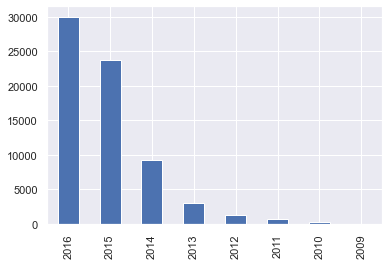

In [50]:
reviews['date'].dt.year.value_counts().plot(kind='bar')

We need to define at least three business questions that we will try to answer with the data provided: 

1. When are the busiest times in Boston? 
2. Which are the "crowded" neighbourhoods by number of AirBNBs?
3. Which are the "crowded" neighbourhoods by number of AirBNBs?

One&two represents a data analysis task, while3 suggests building a regression model that would predict a continuous variable. To answer the questions, we want to understand the features that affect most the variable of interest. 
We could use: 
1. Linear regression, however we have multiple categorical variables, as well as prerequisites for the linear model<br>
2. Better option - to use tree models /random forests, boosted methods/ because: 
- they are easy to interpret in terms of independent variables and their effect on the target variable
- we do not need to transform the categorical variables

From the datasets, we will use the calendar and listings datasets. 
Reviews dataset will not be used due mainly to the fact that there is already a review_scores_rating in the listings data, as well as number of reviews. It might be useful to do some text analytics performed on the comments data, but supposedly the rating value is provided together with the comment -> no point from sentiment analysis. However, from the comments data can be understood the features that drive the rating. So to extract words/noun+verb+adj/->turn them into features, and together with the rest of the features to use them as input to understand what drives the review score.